## Instituto Nacional de Telecomunicações - INATEL

# 1º Projeto - C209/L1

#### Elaborado por: Iza Lopes Ribeiro - 316, Engenharia de Software - P7




### Descrição do Projeto
O Projeto C209, conduzido pelo Laboratório L1, tem como objetivo explorar métodos para manipulação de imagens. Este projeto abrange uma variedade de técnicas, incluindo operações aritméticas, conversão de cores e transformações geométricas, entre outras. 

O foco principal é fornecer um guia passo a passo para a manipulação de imagens, demonstrando cada etapa de forma clara e detalhada.

**1. Etapa)** Utilizaremos as seguintes bibliotecas para a manipulação das imagens:


In [1]:
import numpy as np  # NumPy para operacoes numericas
from PIL import Image  # PIL para manipulacao de imagens
import matplotlib.pyplot as plt  # Matplotlib para plotagem de graficos

**2. Etapa)** Iremos carregar e exibir as imagens que serão utilizadas:

(653, 838, 3)
(238, 212, 3)
(1184, 820, 3)
(1109, 860, 3)


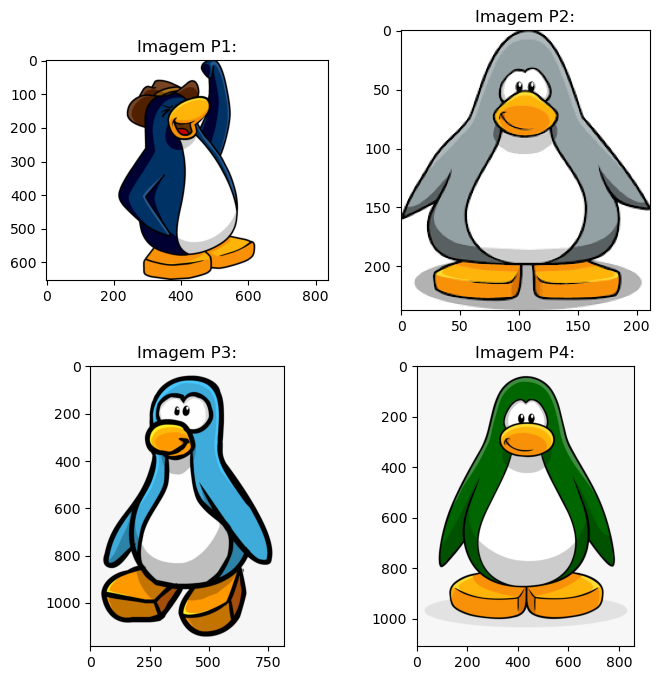

In [2]:
img_P1 = np.array(Image.open('P1.png'))[:,:,:3]         # Retirando o canal alpha
img_P2 = np.array(Image.open('P2.png').convert('RGB'))  # A imagem foi convertida para RGB para aparecer as cores corretamente
img_P3 = np.array(Image.open('P3.jpg'))
img_P4 = np.array(Image.open('P4.png'))[:,:,:3]         # Retirando o canal alpha

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem "P1.png" no primeiro subplot:
print(img_P1.shape)
plt.subplot(2,2,1)
plt.title('Imagem P1:')
plt.imshow(img_P1)

# Exibindo a imagem "P2.png" no segundo subplot:
print(img_P2.shape)
plt.subplot(2,2,2)
plt.title('Imagem P2:')
plt.imshow(img_P2)

# Exibindo a imagem "P3.jpg" no terceiro subplot:
print(img_P3.shape)
plt.subplot(2,2,3)
plt.title('Imagem P3:')
plt.imshow(img_P3)

# Exibindo a imagem "P4.png" no quarto subplot:
print(img_P4.shape)
plt.subplot(2,2,4)
plt.title('Imagem P4:')
plt.imshow(img_P4)


**3. Etapa)** Ao exibi-las, verificamos que ambas possuem dimensões diferentes. Para junta-las em uma única imagem, precisaremos redimensiona-las para uma única escala:

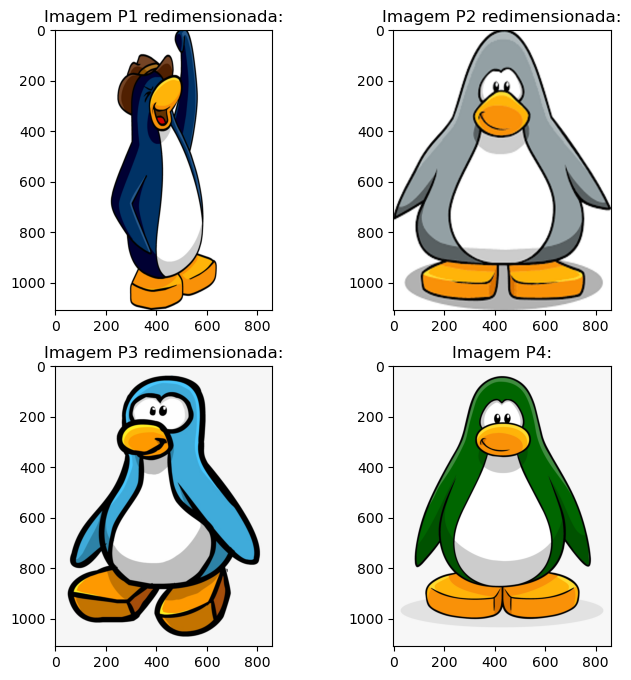

In [3]:
# Redimensionando as imagens para terem as mesmas dimensões que a imagem P4 como referência:
img_P1_resized = np.array(Image.fromarray(img_P1).resize((img_P4.shape[1], img_P4.shape[0])))
img_P2_resized = np.array(Image.fromarray(img_P2).resize((img_P4.shape[1], img_P4.shape[0])))
img_P3_resized = np.array(Image.fromarray(img_P3).resize((img_P4.shape[1], img_P4.shape[0])))

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem "P1.png" redimensionada no primeiro subplot:
plt.subplot(2,2,1)
plt.title('Imagem P1 redimensionada:')
plt.imshow(img_P1_resized)

# Exibindo a imagem "P2.png" redimensionada no segundo subplot:
plt.subplot(2,2,2)
plt.title('Imagem P2 redimensionada:')
plt.imshow(img_P2_resized)

# Exibindo a imagem "P3.jpg" redimensionada no terceiro subplot:
plt.subplot(2,2,3)
plt.title('Imagem P3 redimensionada:')
plt.imshow(img_P3_resized)

# Exibindo a imagem "P4.png" no quarto subplot:
plt.subplot(2,2,4)
plt.title('Imagem P4:')
plt.imshow(img_P4)


**4. Etapa)** Vamos juntar todas as imagens em uma única imagem:

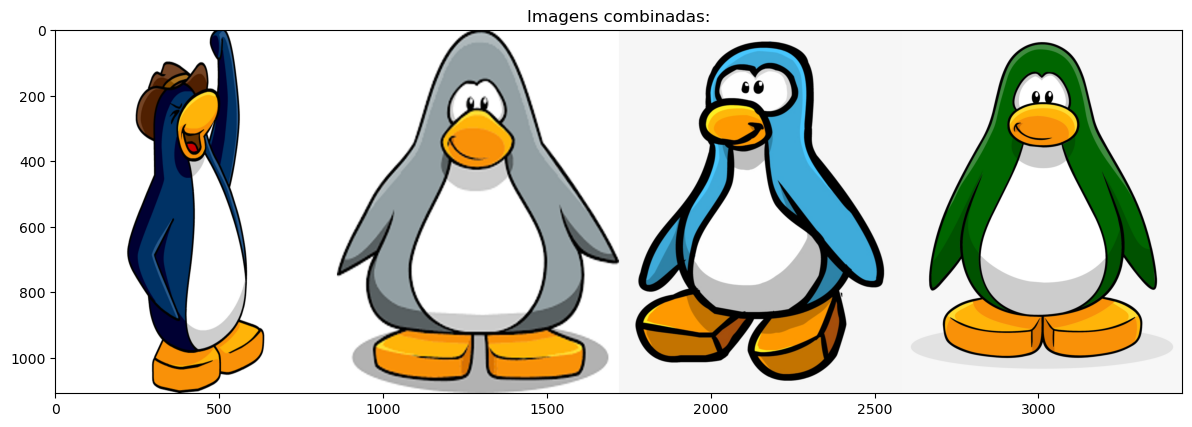

In [4]:
# Juntando todas as imagens:
merged_img = np.concatenate([img_P1_resized, img_P2_resized, img_P3_resized, img_P4], axis=1)

# Criando uma nova figura com tamanho de 32x32 polegadas:
plt.figure(figsize=(32,32))

# Exibindo a imagem resultante da concatenação das imagens no primeiro subplot:
plt.subplot(2,2,1)
plt.title('Imagens combinadas:')
plt.imshow(merged_img)

**5. Etapa)** Em seguida, iremos trocar as cores da imagem resultante para escala de tons de cinza.

Para isso iremos utilizar a função greyscale luminosity:

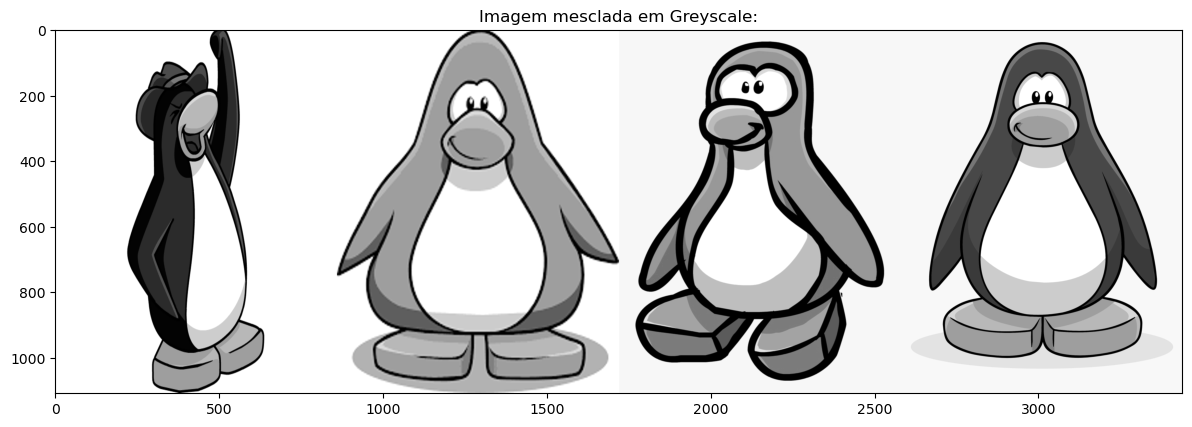

In [5]:
# Função para converter em escala de tons de cinza:
def greyscale(img):
    # Aplicando a fórmula de conversão para escala de cinza em cada canal de cor (R, G, B)
    res = (img[:,:,0] * 0.2126 + 
           img[:,:,1] * 0.7152 + 
           img[:,:,2] * 0.0722).astype(np.uint8)
    
    return res

merged_grey = greyscale(merged_img)

# Criando uma nova figura com tamanho de 32x32 polegadas:
plt.figure(figsize=(32,32))

# Exibindo a imagem mesclada em escala de tons de cinza no primeiro subplot:
plt.subplot(2,2,1)
plt.title('Imagem mesclada em Greyscale:')
plt.imshow(merged_grey, cmap='grey')

**6. Etapa)** Com a imagem mesclada em greyscale, vamos utilizar a função reflexão para refleti-la ao longo do eixo y:

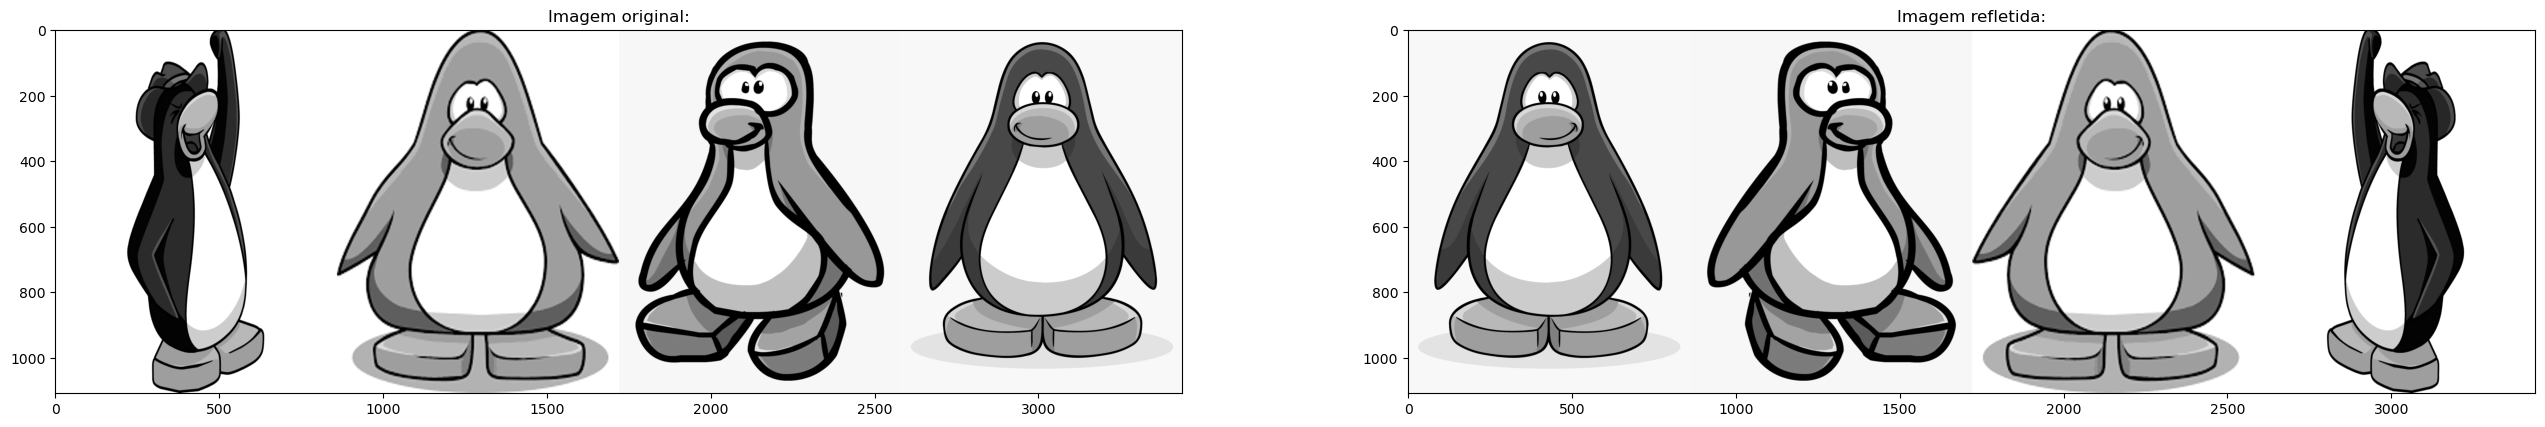

In [6]:
# Função para espelhar a imagem no eixo y:
def reflexao(img):
    (l, c) = img.shape  
    img_reflex = np.zeros(shape=img.shape, dtype=np.uint8)
    
    for i in range(l):
        for j in range(c):
            new_y = -j 
            new_x = i 
            img_reflex[new_x, new_y] = img[i, j]
            
    return img_reflex

merged_refl = reflexao(merged_grey)

# Criando uma nova figura com tamanho de 32x32 polegadas:
plt.figure(figsize=(32,32))

# Exibindo a imagem original no primeiro subplot:
plt.subplot(2,2,1)
plt.title('Imagem original:')
plt.imshow(merged_grey, cmap='grey')

# Exibindo a imagem refletida no segundo subplot:
plt.subplot(2,2,2)
plt.title('Imagem refletida:')
plt.imshow(merged_refl, cmap='grey')


**7. Etapa)** Agora iremos recortar o primeiro pinguim da imagem refletida, para isso precisamos definir alguns parâmetros:

- **Definição das coordenadas de referência para o recorte:** iremos escolher o canto superior esquerdo da imagem original como a referência.
- **Definição da largura e altura do recorte:** iremos definir a largura como 860 pixels e a altura como 1109 pixels (tamanho original da imagem "P4.png")

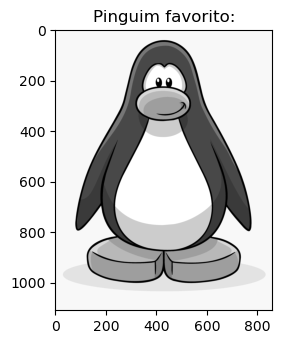

In [31]:
img_refletida = np.array(merged_refl)

referencia = (0, 0)  # Coordenadas de referência x e y
x = 860  # Largura em px
y = 1109 # Altura em px

# seleciona uma região retangular da imagem refletida partindo da referência (0, 0) e com largura x e altura y:
img_recortada = img_refletida[referencia[1]:referencia[1] + y, referencia[0]:referencia[0] + x]

# Convertendo o array numpy para uma imagem:
pinguim_img = Image.fromarray(img_recortada)

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem recortada (pinguim favorito) no primeiro subplot:
plt.subplot(2,1,1)
plt.title('Pinguim favorito:')
plt.imshow(pinguim_img, cmap='grey')


**8. Etapa)** Após obtermos a imagem resultante da etapa anterior, iremos agora analisar o histograma da imagem do pinguim favorito:

- **Histograma:** Um histograma é uma distribuição estatística gerada com base em um conjunto de informações da imagem como cor, contraste e iluminação.

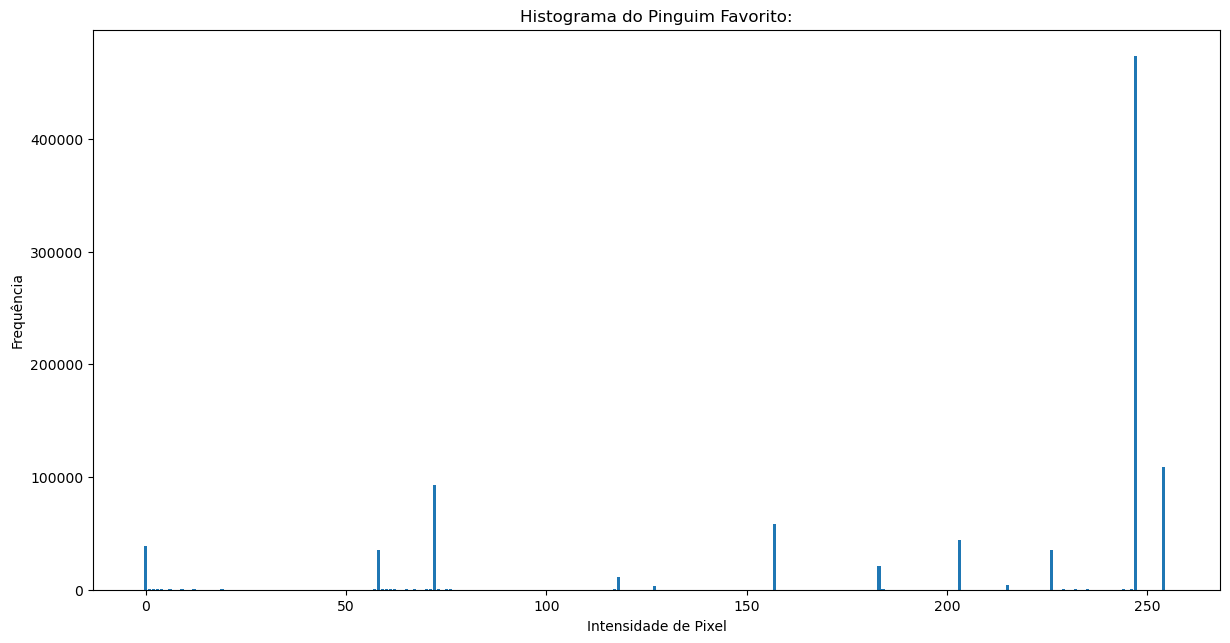

In [77]:
# Função para calcular o histograma de acordo com a frequência e intensidade do pixel:
def histogram_gray(img):
    
    # Obtendo as dimensões da imagem
    (l, c) = img.shape
    
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram

# Função para exibir o histograma calculado:
def show_histogram_gray(img):
    
    # Calculando o histograma da imagem
    histogram = histogram_gray(img)
    
    # Criando uma nova figura com tamanho de 32x16 polegadas:
    plt.figure(figsize=(32, 16))
    
    # Exibindo o histograma da imagem do pinguim no primeiro subplot:
    plt.subplot(2, 2, 1) 
    plt.bar(range(256), histogram) 
    plt.title('Histograma do Pinguim Favorito:') 
    plt.xlabel('Intensidade de Pixel')  
    plt.ylabel('Frequência') 

    plt.show()
    
pinguim_array = np.array(pinguim_img)

# Chamando a função para mostrar o histograma da imagem recortada
show_histogram_gray(pinguim_array)


#### Análise do Histograma e definição do threshold:

Durante a análise do histograma, foram traçadas linhas para conectar os pontos com maior intensidade de pixels por frequência. Observou-se a maior queda na intensidade por frequência entre os valores de 100 e 150 no eixo x (intensidade de pixels), sugerindo uma possível separação entre dois grupos de pixels na imagem (pixels menores que o limiar e pixels maiores que o limiar).

Para encontrar o valor de limiar que minimiza a variância intra-classe e separa os pixels da imagem em dois grupos distintos, identificou-se o ponto médio desse intervalo, que é 125. 

Portanto, o valor de limiar (threshold) escolhido para a binarização da imagem é 125:

(634, 1099, 3)


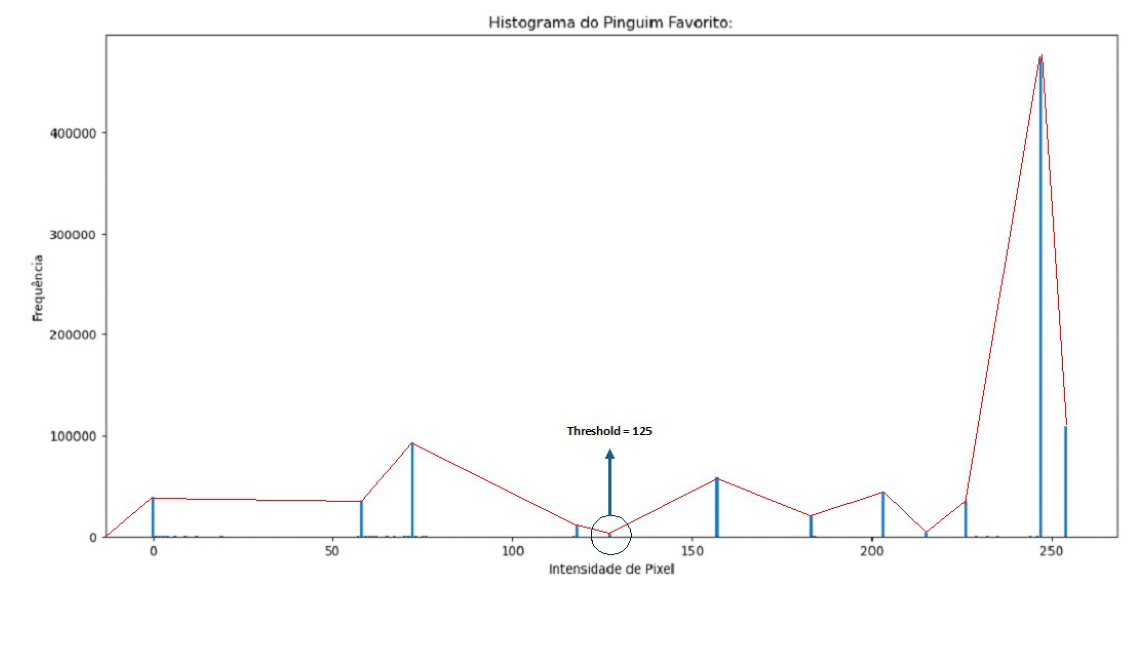

In [75]:
# Exibindo a imagem "P1.png" no primeiro subplot:
analise_img = np.array(Image.open('analise-histograma.jpg'))

# Criando uma nova figura com tamanho de 32x32 polegadas:
plt.figure(figsize=(32,32))

# Exibindo a analise do histograma no primeiro subplot:
plt.subplot(2,2,1)
plt.imshow(analise_img)
plt.axis('off')  # retira os eixos
plt.show()

**9. Etapa)** Ao definir o valor do limiar em 125, aplicaremos uma conversão para que todos os pixels abaixo do limiar (threshold) sejam pintados de preto [0, 0, 0], e os pixels acima do Limiar (threshold) sejam pintados de magenta [255, 0, 255]. 

Assim, obteremos nossa imagem final:

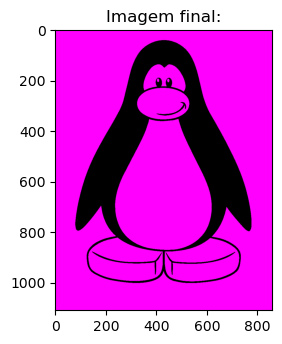

In [82]:
# Função para criar uma imagem binária com base em um valor de threshold:
def binary_img(img, threshould):
    # Obtendo as dimensões da imagem:
    (l,c) = img.shape
    
    res = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
    for i in range(l):
        for j in range(c):
            # Se pixel < threshold, os pixels serão pintados de preto
            if img[i,j] < threshould: 
                res[i,j,:] = [0,0,0]
            else: 
                 # Se pixel > threshold, os pixels serão pintados de magenta
                res[i,j,:] = [255,0,255]
                          
    return res

pinguim_colorido = binary_img(pinguim_array,125) # Threshold definido = 125

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem do pinguim colorido com as cores preto e magenta no primeiro subplot:
plt.subplot(2,1,1)
plt.title('Imagem final:')
plt.imshow(pinguim_colorido)


**10. Etapa)** Salvando a imagem final no disco com o nome "pinguim-final.jpg":

In [83]:
Image.fromarray(pinguim_colorido).save('pinguim-final.jpg')